# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Initializing the agent

In [6]:
from dqn_agent import Agent, Algorithm
from model import QNetwork

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, qnetwork=QNetwork, seed=0, algo=Algorithm.DOUBLE_DQN)

### 4. Training the agent with Double DQN

In [7]:
def double_dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    # Run for n episodes
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # Reset environment
        state = env_info.vector_observations[0]           # collect the first state
        
        # Initialize score
        score = 0
        
        for t in range(max_t):
            action = agent.act(state, eps)                 # Collect the action from the agent
            env_info = env.step(action)[brain_name]        # Step on the environment
            
            next_state = env_info.vector_observations[0]   # Get the next state
            reward = env_info.rewards[0]                   # Collect your reward
            done = env_info.local_done[0]                  # Are we done? 
            
            # Train the agent
            agent.step(state, action, reward, next_state, done)
            
            # Update the score
            score += reward
            
            # Reset teh state
            state = next_state
            if done:
                break
        
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        average_score = np.mean(scores_window) # Collect the average score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score))
            
        if average_score >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'Results/Models/double_dqn.pth')
            break            
    return scores

In [8]:
# Training for 4000 episode, with 2000 timesteps (max)
scores = double_dqn(n_episodes=4000, max_t=2000)

Episode 100	Average Score: 0.60
Episode 200	Average Score: 3.79
Episode 300	Average Score: 8.02
Episode 400	Average Score: 11.30
Episode 469	Average Score: 13.00
Environment solved in 369 episodes!	Average Score: 13.00


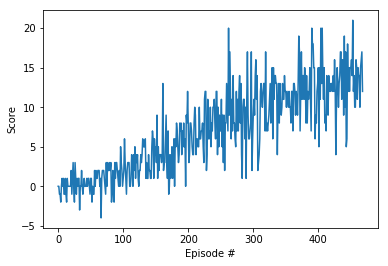

In [9]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig("Results/Scores/double_dqn.png")
plt.show()

### 5. Watch a smart agent in action

In [10]:
agent.qnetwork_local.load_state_dict(torch.load('Results/Models/double_dqn.pth'))

In [11]:
# Turn off training
# Reset the evnironment
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
score = 0

while True:
    # Act on the state
    action = agent.act(state)
    # Collect the env info
    env_info = env.step(action)[brain_name]
    
    # Collect next state and reward
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    
    # Update score and state
    score += reward
    state = next_state
    
    if done:
        break
        
print("Score :{}".format(score))

Score :8.0


In [12]:
env.close()